In [ ]:
# Notebook adapted from Jeremy P. Howard

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [ ]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
# i is the frame nuber!
#https://math.unice.fr/~hheumann/Tutorial/_build/intro_matplotlib.html
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [ ]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('linear_animation.mp4', writer=writer)

In [ ]:
print('Done linear animation')

$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


<h6>Squared Function</h6>

In [ ]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0

n = 300
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [ ]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*x**2*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
#%matplotlib inline
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('squared_animation.mp4', writer=writer)

In [ ]:
print('Done squared animation')

<h6>SGD</h6>

In [ ]:
#this should be slower than gradient descent. 
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): 
    return alpha+beta*x

#constants
beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x_data)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.1
num_iters=10

In [ ]:
#SGD requires a batch size of 1 
def update_alpha_and_beta():
    global alpha, beta
    for i in range(n):
        print("i:",i)
        y_predicted_batch = linear_function(alpha,beta,x_data[i])
        derivative_of_loss_wrt_alpha = 2*(y_predicted_batch-y_data[i])
        derivative_of_loss_wrt_beta = x_data[i]* derivative_of_loss_wrt_alpha
        print("before iters","alpha:",alpha,"beta:",beta)
        for _ in range(num_iters):
            #print("y_predicted_batch:",y_predicted_batch)
            #print("x_batch:",x_batch,"y_batch:",y_batch)
            #print("learning_rate:",learning_rate)
            #print("2*learning_rate*(y_predicted_batch-y_batch)",2*learning_rate*(y_predicted_batch-y_batch))
            #print("2*x_batch*(y_predicted_batch-y_batch)",2*x_batch*(y_predicted_batch-y_batch))
            alpha = alpha - 2*learning_rate*(y_predicted_batch-y_data[i])
            beta = beta - learning_rate*2*x_data[i]*(y_predicted_batch-y_data[i])
            y_predicted_batch = linear_function(alpha,beta,x_data[i])
        #print("after iters","alpha:",alpha,"beta:",beta)
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for _ in range(20):
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
# bug here if it doesnt complete
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('SGD_animation.mp4', writer=writer)

<h6>GD w/momentum</h6>

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01
initial_velocity=0.1

mom=0.9
v_alpha = 0
v_beta = 0

In [ ]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x * derivative_of_loss_wrt_alpha
    v_alpha = mom*v_alpha - np.mean(learning_rate*derivative_of_loss_wrt_alpha)
    v_beta = mom*v_beta - np.mean(learning_rate*derivative_of_loss_wrt_beta)
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
resulting_animation

<h6>Test Vectorized mean</h6>



In [ ]:
# nonvectorized version. do not do this. 
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #more efficient code w/o the loop bc it is vectorized
    for i in range(n):
        y_predicted = linear_function(alpha,beta,x[i])
        derivative_of_loss_wrt_alpha = 2*(y_predicted-y[i])
        derivative_of_loss_wrt_beta = x[i] * derivative_of_loss_wrt_alpha
        v_alpha = mom*v_alpha - (1/n)*learning_rate*derivative_of_loss_wrt_alpha
        v_beta = mom*v_beta - (1/n)*learning_rate*derivative_of_loss_wrt_beta 
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
#all the code I see on blogs are wrong. Only JH got it right. 
import time
test = np.random.rand(100000000)

def vec_mean():
    start_time = time.time()
    test.mean()
    end_time = time.time()
    print("vec mean time:",end_time-start_time)
def nonvec_mean():
    start_time = time.time()
    sum=0.
    for i in range(len(test)):
        sum += test[i]
    mean = sum/len(test)
    end_time = time.time()
    print("nonvec mean time:",end_time-start_time)
    
vec_mean()
nonvec_mean()


<h6>GD with Nesterov</h6>


<p>The Loss function replaces theta with theta_tilde </p>
$L(f(x^{(i)}); \tilde \theta,y^{(i)})$
<p>where theta_tilde is theta with a constant times velocity</p>
$\tilde \theta = \theta + \alpha v $
<p>To calculate the gradient g we need to compute the partial derivatives of the loss function</p>
$loss=(\hat y -\tilde y)$
<p>where we convert theta to theta_tilde by replacing all the parameters in the linear equation with tilde versions</p>
$y(\tilde \theta) = \tilde A x + \tilde B$ compared to before $y(\theta) = Ax+b$
<p>We changed notation from the earlier convention to avoid confusion with the IG defition of alpha as the
momentum coefficient vs. alpha defined as a theta parameter as before</p>
$Loss(\tilde \theta)=(\hat y -y(\tilde \theta))^2$
<p>Taking the partial derivatives of the loss WRT A and B which is the equivalent of taking the partials WRT alpha and beta earlier</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A }=2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial A}=2(\hat y -y(\tilde \theta))(-x) $
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= 2(\hat y -y(\tilde \theta)) \cfrac{\partial (\tilde y - y(\tilde \theta))}{\partial B}=2(\hat y -y(\tilde \theta))(-1) $
<p>Converting the expectations to mean</p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial A} = \cfrac{-2}{N}\sum_{1}^{N}x(\hat y - y(\theta))$
<p></p>
$\cfrac{\partial Loss(\tilde \theta)}{\partial B }= \cfrac{-2}{N}\sum_{1}^{N}(\hat y - y(\theta))$
<p>The difference with gradient descent is the negative signs</p>



In [1]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [2]:
def linear_function(alpha,beta,x): 
    return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 300
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01


mom=0.9
v_alpha = 0
v_beta = 0
alpha_tilde=0
beta_tilde=0


In [3]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #interim update
    alpha_tilde = alpha + mom*v_alpha
    beta_tilde = beta + mom*v_beta
    for i in range(n):
        y_predicted = linear_function(alpha_tilde,beta_tilde,x[i])
        derivative_of_loss_wrt_alpha_theta_tilde = -(2/n)*(y_predicted-y[i])
        derivative_of_loss_wrt_beta_theta_tilde = x[i] * derivative_of_loss_wrt_alpha_theta_tilde
    #gradient update
    v_alpha = mom*v_alpha - learning_rate*derivative_of_loss_wrt_alpha_theta_tilde
    v_beta = mom*v_beta - learning_rate*derivative_of_loss_wrt_beta_theta_tilde
    #velocity update
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

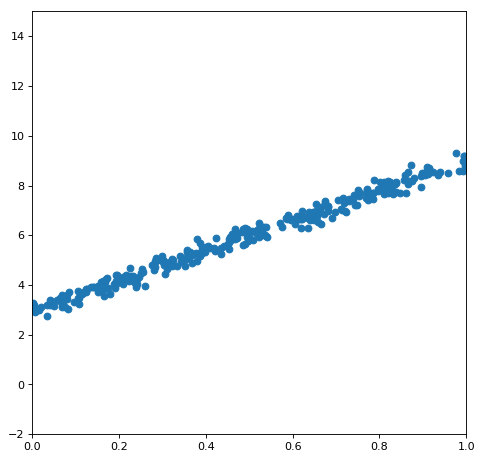

In [4]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [5]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [6]:
resulting_animation

<h6>Ada Optimization</h6>

In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

#epsilon
mom=0.9
#r
r=0



In [ ]:
def update_alpha_and_beta():
    global alpha, beta,v_alpha,v_beta
    #interim update
    r=0
    for i in range(n):
        y_predicted = linear_function(alpha,beta,x[i])
        derivative_of_loss_wrt_alpha  = (2/n)*(y_predicted-y[i])
        derivative_of_loss_wrt_beta = x[i] * derivative_of_loss_wrt_alpha_theta_prime
    #gradient update
    v_alpha = mom*v_alpha - learning_rate*derivative_of_loss_wrt_alpha_theta_prime
    v_beta = mom*v_beta - learning_rate*derivative_of_loss_wrt_beta_theta_prime
    #velocity update
    alpha = alpha + v_alpha
    beta = beta + v_beta
    
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)